In [140]:
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import defaultdict
import math
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Preprocessing
- Remove stopwords
- Remove SGML tags
- Remove numbers and punctuation, normalize whitespace
- Tokenize
- Stem the tokens
- Remove stop-words after stemming


In [141]:
# Download stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /home/mhmmd/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [142]:
def preprocess_text(text):
    # Remove SGML tags
    text = re.sub(r"<[^>]+>", "", text)

    # Remove numbers and punctuation, normalize whitespace
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # Normalize whitespace

    # Tokenize
    tokens = re.findall(r"\b\w+\b", text.lower())

    # Stem the tokens
    stemmed_tokens = [stemmer.stem(word) for word in tokens]

    # Remove stop-words after stemming
    filtered_tokens = [
        word for word in stemmed_tokens if word not in stop_words and len(word) > 2
    ]

    return filtered_tokens

In [143]:
processed_documents = {}
docs_dir = "docs"
for file_name in os.listdir(docs_dir):
    file_path = os.path.join(docs_dir, file_name)
    if os.path.isfile(file_path):
        with open(file_path, "r") as file:
            text = file.read()
            processed_documents[file_name] = preprocess_text(text)
total_num_docs = len(processed_documents.keys())
total_num_docs

1400

# Indexing
- inverted index
![inverted index](https://image1.slideserve.com/1746257/inverted-index-n.jpg)
- Document frequency/Document length
- Term frequency
- TF-IDF (ddd.qqq?)


**here we use lnc.ltc method**

In [144]:
inverted_index = defaultdict(list)

for doc, text in processed_documents.items():
    for w in text:
        inverted_index[w].append(doc)
inverted_index["experiment"]

['0001',
 '0001',
 '0011',
 '0012',
 '0016',
 '0017',
 '0019',
 '0025',
 '0029',
 '0030',
 '0030',
 '0035',
 '0037',
 '0041',
 '0043',
 '0047',
 '0052',
 '0053',
 '0058',
 '0069',
 '0070',
 '0074',
 '0078',
 '0078',
 '0084',
 '0084',
 '0099',
 '0099',
 '0101',
 '0103',
 '0112',
 '0115',
 '0121',
 '0123',
 '0123',
 '0123',
 '0131',
 '0137',
 '0140',
 '0142',
 '0154',
 '0156',
 '0167',
 '0168',
 '0170',
 '0171',
 '0171',
 '0173',
 '0173',
 '0176',
 '0179',
 '0179',
 '0183',
 '0184',
 '0186',
 '0186',
 '0186',
 '0187',
 '0188',
 '0189',
 '0191',
 '0195',
 '0195',
 '0195',
 '0197',
 '0197',
 '0202',
 '0203',
 '0206',
 '0206',
 '0207',
 '0207',
 '0212',
 '0216',
 '0220',
 '0222',
 '0225',
 '0225',
 '0227',
 '0230',
 '0234',
 '0234',
 '0234',
 '0234',
 '0245',
 '0251',
 '0256',
 '0256',
 '0257',
 '0262',
 '0271',
 '0271',
 '0273',
 '0277',
 '0282',
 '0283',
 '0286',
 '0287',
 '0289',
 '0294',
 '0295',
 '0304',
 '0307',
 '0329',
 '0329',
 '0330',
 '0330',
 '0334',
 '0334',
 '0338',
 '0339',
 

In [145]:
i_doc_freq = defaultdict(int)  # term -> number of docs
term_freq = {}  # term -> num of this term in each doc
N = len(processed_documents)
for term, p_list in inverted_index.items():
    i_doc_freq[term] = math.log(N / len(p_list), 10)
    for doc in p_list:
        doc_tf = term_freq.setdefault(term, [0 for _ in range(N)])
        doc_tf[int(doc) - 1] += 1
        term_freq[term] = doc_tf
term_freq["experiment"]

[2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 3,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 3,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,


In [146]:
for t, f in term_freq.items():
    term_freq[t] = [1 + math.log10(t) if t != 0 else 0 for t in f]

term_freq["experiment"]

[1.3010299956639813,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.0,
 1.0,
 0,
 0,
 0,
 1.0,
 1.0,
 0,
 1.0,
 0,
 0,
 0,
 0,
 0,
 1.0,
 0,
 0,
 0,
 1.0,
 1.3010299956639813,
 0,
 0,
 0,
 0,
 1.0,
 0,
 1.0,
 0,
 0,
 0,
 1.0,
 0,
 1.0,
 0,
 0,
 0,
 1.0,
 0,
 0,
 0,
 0,
 1.0,
 1.0,
 0,
 0,
 0,
 0,
 1.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.0,
 1.0,
 0,
 0,
 0,
 1.0,
 0,
 0,
 0,
 1.3010299956639813,
 0,
 0,
 0,
 0,
 0,
 1.3010299956639813,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.3010299956639813,
 0,
 1.0,
 0,
 1.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 0,
 0,
 0,
 1.0,
 0,
 1.4771212547196624,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.0,
 0,
 0,
 0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 1.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.0,
 0,
 1.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.0,
 1.0,
 0,
 1.0,
 1.3010299956639813,
 0,
 1.3010299956639813,
 0,
 0,
 1.0,
 0,
 0,
 1.3010299956639813,
 0,
 0,
 0,
 1.0,
 1.0,
 0,
 1.4771212547196624,
 1.0,
 1.0,
 1.0

In [147]:
import numpy as np

doc_tf = np.array(list(term_freq.values()))
doc_tf, doc_tf.shape

(array([[1.30103, 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
        [1.     , 1.     , 0.     , ..., 0.     , 0.     , 1.     ],
        [1.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
        ...,
        [0.     , 0.     , 0.     , ..., 0.     , 1.     , 0.     ],
        [0.     , 0.     , 0.     , ..., 0.     , 1.     , 0.     ],
        [0.     , 0.     , 0.     , ..., 0.     , 0.     , 1.     ]]),
 (7138, 1400))

## normalize

In [148]:
doc_tf = doc_tf / np.linalg.norm(doc_tf, ord=2, axis=0)
doc_tf, doc_tf.shape

(array([[0.15381981, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.11822926, 0.09856518, 0.        , ..., 0.        , 0.        ,
         0.13502729],
        [0.11822926, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.14771972,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.14771972,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.13502729]]),
 (7138, 1400))

# Similarity between query and doc
- cosine similarity
- processing queries like documents
- TfidfVectorizer
- ranking of documents for each query and creating a query_doc dict

In [149]:
def preprocess_query(query):
    # Preprocess the query similar to preprocess_text function
    return preprocess_text(query)

In [150]:
def calculate_cosine_similarity(doc_vector, query_vector):
    # Calculate cosine similarity between document and query vectors
    cosine_similarities = cosine_similarity(
        doc_vector.reshape(1, -1), query_vector.T
    ).flatten()
    return cosine_similarities

In [151]:
def process_queries(queries_file_path):
    processed_queries = {}
    with open(queries_file_path, "r") as file:
        for line in file:
            query_id, query_text = line.strip().split("\t")
            processed_queries[query_id] = preprocess_text(query_text)
    return processed_queries

In [152]:
queries_file_path = "queries.txt"
with open(queries_file_path, "r") as file:
    queries = [line.strip() for line in file]

# Preprocess queries
preprocessed_queries = [preprocess_query(query) for query in queries]

In [153]:
# uncomment to see custom query results
# queries = [
#     "experiment", #common term
#     """andincompressible flow, it is shown that jet swirl decays more rapidly than wake swirl whereas both swirls decay more
#     rapidly than the non-uniformity in axial velocity .  
#     large swirl generates axial pressure gradients as well as large radial pressure gradients, """, # 1377
#     "simply-supported .  it is shown that, as a consequence of increasing the",  # 1396
#     "hello", # irrelevant
#     "stiffener",  # 1398
#     "this",  # stop word
# ]
# preprocessed_queries = [preprocess_query(query) for query in custom_queries]

In [154]:
tf_idf_query = []
N = len(processed_documents)
for text in preprocessed_queries:
    tf_q = {k: 0 for k in term_freq.keys()}  # term -> num of this term in each doc
    for w in text:
        if w in term_freq:
            tf_q[w] += 1
    norm = math.sqrt(sum(t**2 for t in tf_q.values()))
    norm = norm if norm != 0 else 1
    for w in tf_q:
        tf_q[w] = (
            (1 + math.log10(tf_q[w]) if tf_q[w] != 0 else 0) * i_doc_freq[w] / norm
        )
    tf_idf_query.append(np.array(list(tf_q.values())))
tf_idf_query = np.array(tf_idf_query).T
tf_idf_query, tf_idf_query.shape

(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.13522732, 0.14254212, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 (7138, 10))

In [155]:
cosine_similarities = cosine_similarity(doc_tf.T, tf_idf_query.T)
cosine_similarities.shape

(1400, 10)

In [156]:
# Rank documents for each query in reverse order based on cosine similarity
query_doc = {}
for i, query in enumerate(queries):
    sorted_indices = np.argsort(cosine_similarities[:, i])[
        ::-1
    ]  # Sort indices in descending order
    sorted_documents = [
        (list(processed_documents.keys())[idx], cosine_similarities[idx, i])
        for idx in sorted_indices
    ]
    query_doc[str(i)] = [
        list(processed_documents.keys())[idx] for idx in sorted_indices
    ]
    print(f"Query: {query}")
    for doc_id, similarity in sorted_documents[:20]:
        print(f"Document ID: {doc_id}, Similarity: {similarity}")
    print("\n")
print(query_doc)

Query: what investigations have been made of the wave system created by a static pressure distribution over a liquid surface .
Document ID: 0958, Similarity: 0.1647744229365691
Document ID: 0175, Similarity: 0.14822142491255424
Document ID: 0407, Similarity: 0.1453663937056803
Document ID: 1269, Similarity: 0.14380603385024116
Document ID: 1220, Similarity: 0.12777200375339134
Document ID: 0968, Similarity: 0.12493977073409215
Document ID: 0693, Similarity: 0.12247641728033412
Document ID: 1206, Similarity: 0.1179516761801831
Document ID: 1225, Similarity: 0.1155105605575951
Document ID: 1032, Similarity: 0.11373583672331081
Document ID: 0466, Similarity: 0.11214148295065608
Document ID: 0974, Similarity: 0.1110484404985977
Document ID: 0330, Similarity: 0.11057502014649223
Document ID: 0905, Similarity: 0.10272304108585953
Document ID: 1156, Similarity: 0.10250512753949455
Document ID: 0039, Similarity: 0.10248524969056638
Document ID: 1288, Similarity: 0.10086458658435375
Document ID

In [160]:
# for k,v in query_doc.items():
#     print(k,':')
#     print(v[:5])

# Evaluation
- parse relevance.txt file and create a similar to query_doc
- claculating precesion and recall
- https://en.wikipedia.org/wiki/Evaluation_measures_(information_retrieval)

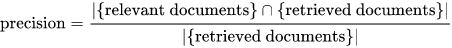
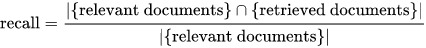



In [158]:
# load relevance.txt in a dict
relevance_file_path = "relevance.txt"
relations = {}
with open(relevance_file_path, "r") as file:
    for line in file:
        parts = line.strip().split()
        key = parts[0]
        value = parts[1]
        if key in relations:
            relations[key].append(value)
        else:
            relations[key] = [value]

print(relations)

{'1': ['156'], '2': ['666', '667', '1258', '1394', '668', '670', '1204', '1391', '1395', '1300', '37', '559', '630', '1107', '1213'], '3': ['24', '101', '666', '667', '93', '1258', '1393', '559', '630', '662', '1104', '1107', '1204', '1213', '1300'], '4': ['1391', '666', '667', '1258', '1078', '1080', '1081', '1394', '1395', '1214', '1198', '1204', '1300', '559', '630', '662', '1107', '1213'], '5': ['1383', '1385', '155', '241', '1382', '1370', '1386', '111', '1384', '150', '292', '458', '479', '977', '376', '459', '1365', '62', '1366'], '6': ['155', '1383', '1385', '1382', '62', '292', '241', '1370', '1384', '458', '459', '461', '1386', '1365', '1366', '111', '150', '479'], '7': ['400', '419', '1387', '412', '1392', '1398', '1397', '1400', '1399'], '8': ['400', '1387', '1392', '1398'], '9': ['656', '1313', '1317', '1316', '1318', '1319', '1157', '1274'], '10': ['1379', '1305', '1304', '40', '293', '1309', '161', '421', '1377', '1378', '1381', '225', '1380', '448', '449', '1124', '1280

In [159]:
def calculate_precision_recall(actual_relevant_docs, retrieved_docs, query_num):
    relevant_docs = actual_relevant_docs.get(query_num, [])
    retrieved_docs_for_query = retrieved_docs.get(query_num, [])
    precisions = []
    recalls = []

    for i in [10, 50, 100, 500]:
        true_positives = len(set(relevant_docs) & set(retrieved_docs_for_query[:i]))
        false_positives = i - true_positives
        false_negatives = len(relevant_docs) - true_positives
        precision = true_positives / i if i > 0 else 0
        recall = true_positives / len(relevant_docs) if len(relevant_docs) > 0 else 0
        precisions.append(precision)
        recalls.append(recall)
    return precisions, recalls


# Example data
actual_relevant_docs = relations
retrieved_docs = query_doc  # Retrieved documents for query 3

query_precisions = []
query_recalls = []

for query_num in retrieved_docs.keys():
    precisions, recalls = calculate_precision_recall(
        actual_relevant_docs, retrieved_docs, query_num
    )
    query_precisions.append(precisions)
    query_recalls.append(recalls)
    print(f"Query {query_num} - Precisions: {precisions}, Recalls: {recalls}")

avg_precisions = [
    sum(precisions) / len(precisions) for precisions in zip(*query_precisions)
]
avg_recalls = [sum(recalls) / len(recalls) for recalls in zip(*query_recalls)]

print(f"Average Precision: {avg_precisions}")
print(f"Average Recall: {avg_recalls}")

Query 0 - Precisions: [0.0, 0.0, 0.0, 0.0], Recalls: [0, 0, 0, 0]
Query 1 - Precisions: [0.0, 0.0, 0.0, 0.0], Recalls: [0.0, 0.0, 0.0, 0.0]
Query 2 - Precisions: [0.0, 0.1, 0.06, 0.016], Recalls: [0.0, 0.3333333333333333, 0.4, 0.5333333333333333]
Query 3 - Precisions: [0.0, 0.0, 0.0, 0.006], Recalls: [0.0, 0.0, 0.0, 0.2]
Query 4 - Precisions: [0.0, 0.0, 0.02, 0.008], Recalls: [0.0, 0.0, 0.1111111111111111, 0.2222222222222222]
Query 5 - Precisions: [0.1, 0.06, 0.03, 0.016], Recalls: [0.05263157894736842, 0.15789473684210525, 0.15789473684210525, 0.42105263157894735]
Query 6 - Precisions: [0.0, 0.0, 0.0, 0.004], Recalls: [0.0, 0.0, 0.0, 0.1111111111111111]
Query 7 - Precisions: [0.3, 0.12, 0.06, 0.012], Recalls: [0.3333333333333333, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]
Query 8 - Precisions: [0.0, 0.0, 0.0, 0.002], Recalls: [0.0, 0.0, 0.0, 0.25]
Query 9 - Precisions: [0.0, 0.02, 0.01, 0.004], Recalls: [0.0, 0.125, 0.125, 0.25]
Average Precision: [0.04, 0.03, 0.018, 